<a href="https://colab.research.google.com/github/rvgithubi/GraficosCurso/blob/main/2025B_Tec_Emergentes_Supervised_Learning_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Support Vector Machine


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

Load database

In [ ]:
# Load Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # use only first two features for visualization
y = iris.target


Scale and Split

In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardize features
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

Alternative


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
# Standardize features
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Classify

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Define SVM classifier
#svm_clf = SVC(kernel='linear', random_state=42)
#svm_clf = SVC(kernel='rbf', random_state=42)
svm_clf = SVC(kernel='rbf', C=10,gamma=1, random_state=42)
#svm_clf = SVC(kernel='rbf', gamma=0.1, random_state=42)

# Fit the classifier to the training data
svm_clf.fit(X_train, y_train)

# Predict on the test data
y_pred_svm = svm_clf.predict(X_test)

# Evaluate accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Classifier Accuracy: {accuracy_svm:.3f}")

SVM Classifier Accuracy: 0.800


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['rbf', 'linear']}

# Create a GridSearchCV object
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)  #Exhaustive search

# Fit the grid search to the data
grid.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters found by GridSearchCV:")
print(grid.best_params_)
print(f"Best accuracy score: {grid.best_score_:.3f}")

# Make predictions with the best estimator
grid_predictions = grid.predict(X_test)

# Evaluate accuracy with the best estimator
accuracy_grid = accuracy_score(y_test, grid_predictions)
print(f"Accuracy on test set with best parameters: {accuracy_grid:.3f}")

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.

Show results

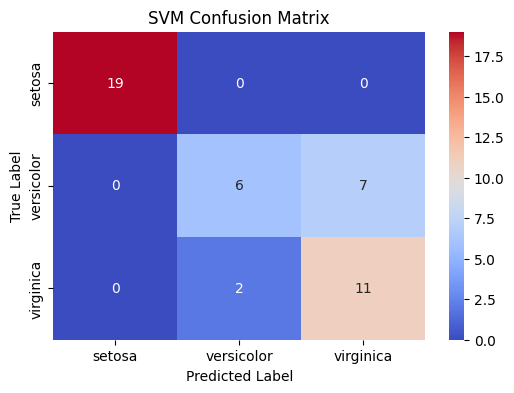

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Display the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='coolwarm', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Define Decision Tree classifier
tree_clf = DecisionTreeClassifier(random_state=42)

# Fit the classifier to the training data
tree_clf.fit(X_train, y_train)

# Predict on the test data
y_pred_tree = tree_clf.predict(X_test)

# Evaluate accuracy
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f"Decision Tree Classifier Accuracy: {accuracy_tree:.3f}")

Decision Tree Classifier Accuracy: 0.667


Alternative methods

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score

Load dataset

In [ ]:


# Load Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # use only first two features for visualization
y = iris.target


Divide dataset into Training and Test samples

In [ ]:

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Set Classifiers

In [ ]:

# Standardize features
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Define classifiers
classifiers = {
    "Naive Bayes": GaussianNB(),
    "KNN (k=5)": KNeighborsClassifier(n_neighbors=5),
    "LDA": LinearDiscriminantAnalysis(),
    "QDA": QuadraticDiscriminantAnalysis()
}

# Fit and evaluate
results = {}
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"{name}: Accuracy = {acc:.3f}")


Naive Bayes: Accuracy = 0.822
KNN (k=5): Accuracy = 0.800
LDA: Accuracy = 0.844
QDA: Accuracy = 0.800


Plot results

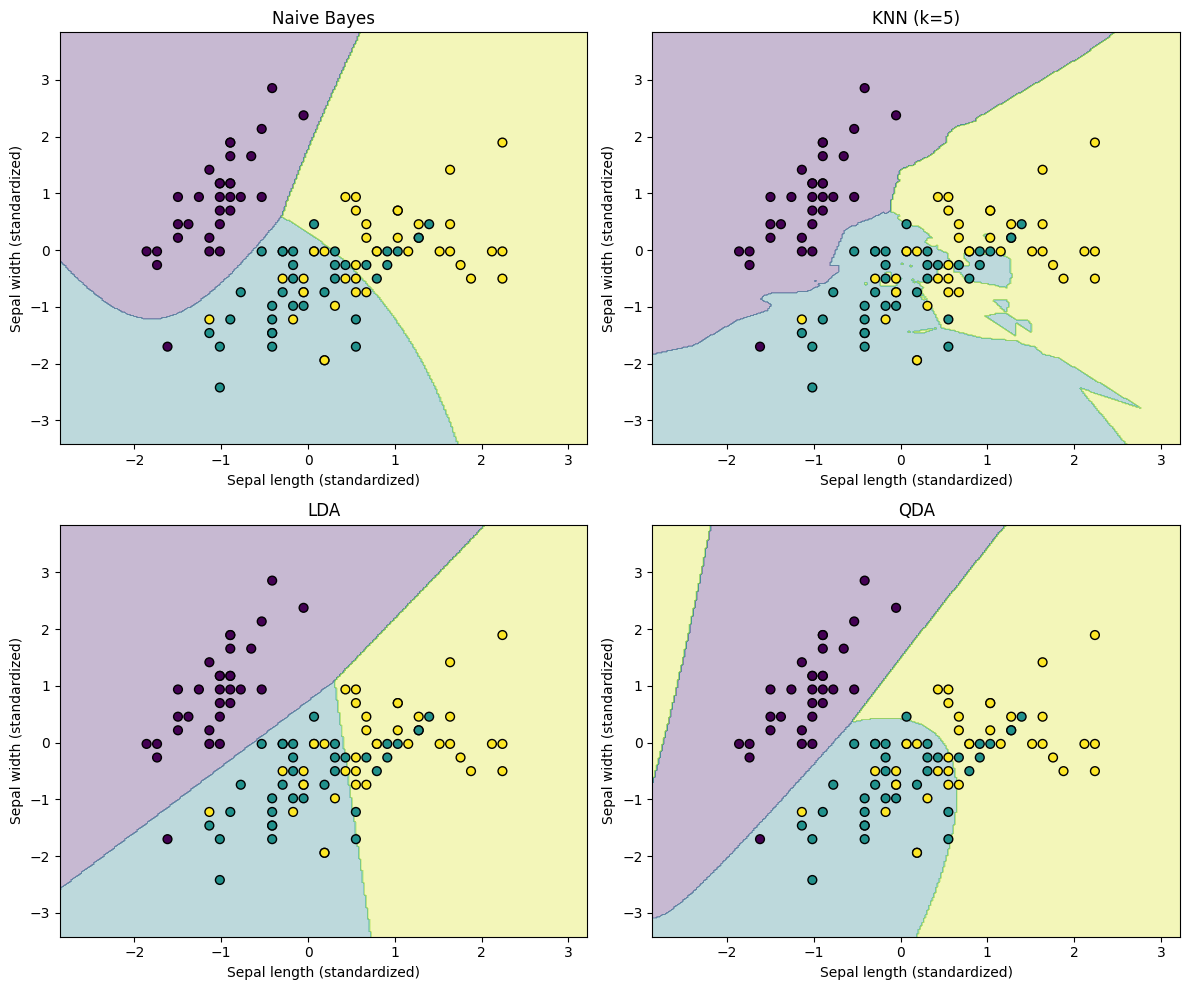

In [ ]:

# Decision boundary visualization
def plot_decision_boundaries(X, y, clf, title):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=40)
    plt.title(title)
    plt.xlabel("Sepal length (standardized)")
    plt.ylabel("Sepal width (standardized)")

plt.figure(figsize=(12, 10))
for i, (name, clf) in enumerate(classifiers.items(), 1):
    plt.subplot(2, 2, i)
    plot_decision_boundaries(X_train, y_train, clf, f"{name}")

plt.tight_layout()
plt.show()


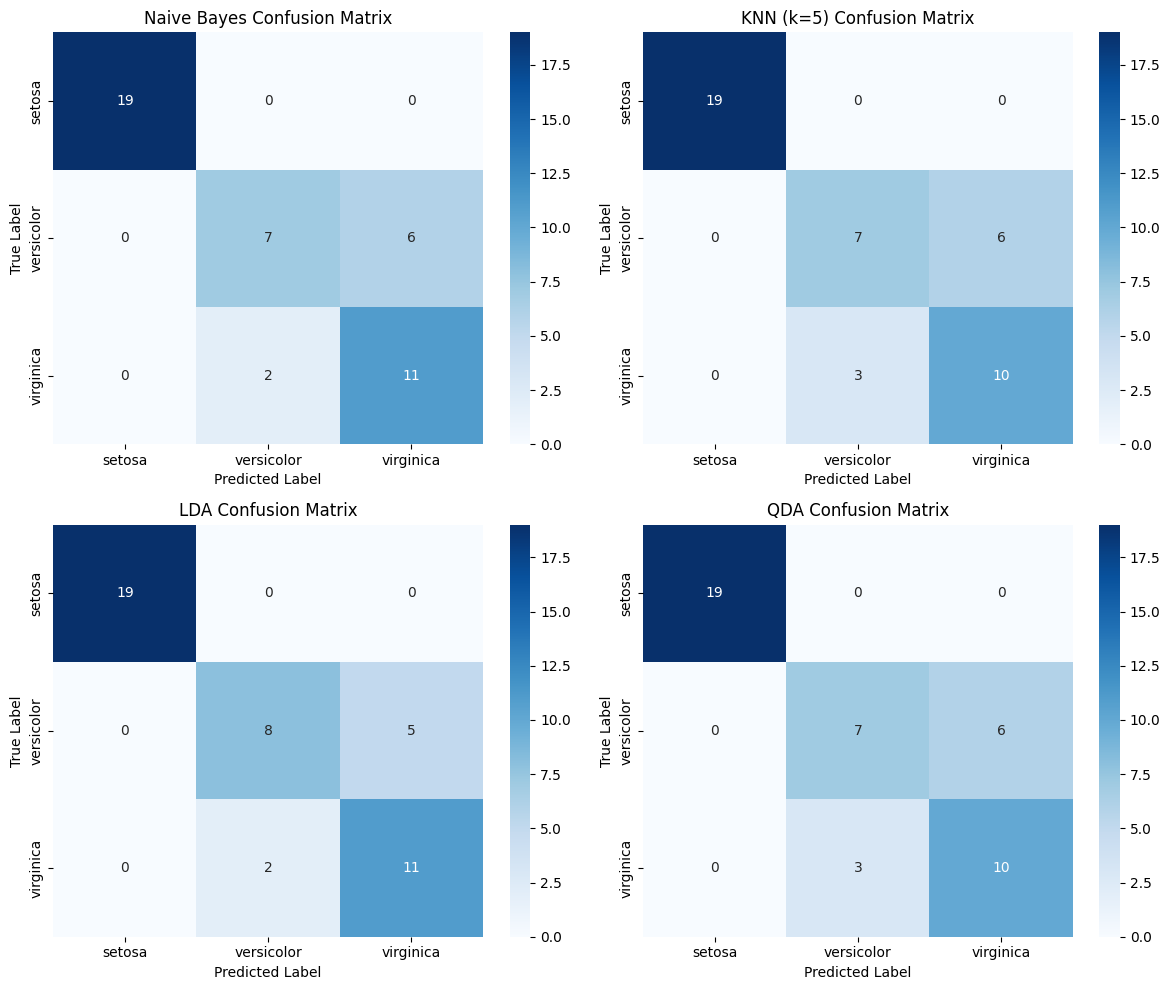

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Confusion Matrix Visualization
plt.figure(figsize=(12, 10))
for i, (name, clf) in enumerate(classifiers.items(), 1):
    plt.subplot(2, 2, i)
    y_pred = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")

plt.tight_layout()
plt.show()